In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import os
import sys
import pathlib
import pickle

sys.path.append('..')

In [4]:
import seaborn as sns
import matplotlib.style as style
import pandas as pd
from sklearn.metrics import auc

In [5]:
from pals.evaluation import evaluate_performance, compute_pr_curve, get_method_true_answers, get_auc_for_hat_data
from pals.common import *

2020-02-09 15:30:39.561 | WARNING  | pals.reactome:get_neo4j_driver:14 - Using a default neo4j server: bolt://localhost:7687
2020-02-09 15:30:39.562 | WARNING  | pals.reactome:get_neo4j_driver:19 - Using a default neo4j username or password: neo4j
2020-02-09 15:30:40.661 | INFO     | pals.reactome:get_neo4j_driver:24 - Created graph database driver for bolt://localhost:7687 (neo4j)


In [6]:
style.use('seaborn-poster') # sets the size of the charts
sns.set_context('poster') # everything is larger

# HAT Data Evaluation

This notebook is used to compute precision, recall and F-1 scores on the HAT data for the manuscript.

In [7]:
base_dir = os.path.join('test_data', 'HAT')

In [8]:
results = load_obj(os.path.join(base_dir, 'HAT_results.p'))

In [9]:
# set_log_level_info()

In [10]:
N = None

### Plasma

In [11]:
experiment_name = 'plasma'
res = results[experiment_name]
method_true_answers = get_method_true_answers(res, N=N)

2020-02-09 15:30:48.748 | DEBUG    | pals.feature_extraction:change_zero_peak_ints:295 - Setting the zero intensity values in the dataframe
2020-02-09 15:30:48.853 | DEBUG    | pals.feature_extraction:standardize_intensity_df:276 - Scaling the data across the sample: zero mean and unit variance
2020-02-09 15:30:48.926 | DEBUG    | pals.PALS:get_plage_activity_df:79 - Mean values of the rows in the DF is [ 0. -0.  0. ... -0. -0. -0.]
2020-02-09 15:30:48.927 | DEBUG    | pals.PALS:get_plage_activity_df:80 - Variance in the rows of the DF is [1. 1. 1. ... 1. 1. 1.]
2020-02-09 15:30:51.605 | DEBUG    | pals.PALS:set_up_resample_plage_p_df:91 - Calculating plage p-values with resampling
2020-02-09 15:30:51.605 | DEBUG    | pals.PALS:set_up_resample_plage_p_df:98 - Comparison Stage1/Control
2020-02-09 15:30:51.606 | DEBUG    | pals.PALS:set_up_resample_plage_p_df:106 - Resampling 0/1000
2020-02-09 15:30:51.726 | DEBUG    | pals.PALS:set_up_resample_plage_p_df:106 - Resampling 100/1000
2020-0

In [12]:
results['plasma']['data_source'].get_measurements().shape, results['plasma']['case'], \
len(results['plasma']['data_source'].groups[results['plasma']['case']]), \
results['plasma']['control'], \
len(results['plasma']['data_source'].groups[results['plasma']['control']]), \

((15584, 60), 'Stage1', 20, 'Control', 20)

In [13]:
method_true_answers

{'PALS':                                                         pw_name       p_value  \
 map04961      Endocrine and other factor-regulated calcium r...  0.000000e+00   
 map07226      Progesterone, androgen and estrogen receptor a...  0.000000e+00   
 map00903                        Limonene and pinene degradation  1.061208e-14   
 map00622                                     Xylene degradation  3.201168e-11   
 map00930                                Caprolactam degradation  3.038590e-10   
 map00902                             Monoterpenoid biosynthesis  5.487802e-10   
 map00626                                Naphthalene degradation  1.990708e-09   
 map00623                                    Toluene degradation  3.544569e-08   
 map00981                            Insect hormone biosynthesis  1.398219e-07   
 map05215                                        Prostate cancer  2.900414e-07   
 map00982                      Drug metabolism - cytochrome P450  4.201077e-07   
 map0491

In [14]:
plasma_f1_df = evaluate_performance(res, method_true_answers, N)

2020-02-09 15:31:33.802 | DEBUG    | pals.evaluation:evaluate_performance:425 - Evaluating partial results
2020-02-09 15:31:48.621 | DEBUG    | pals.evaluation:evaluate_performance:462 - Done!


In [86]:
plasma_f1_df[plasma_f1_df['method'] == 'PALS'].groupby('missing_peaks').describe()['precision']

,count,mean,std,min,25%,50%,75%,max
missing_peaks,,,,,,,,
0.2,500.0,0.855006,0.075329,0.633333,0.807692,0.860390,0.909091,1.0
0.4,500.0,0.757343,0.083720,0.545455,0.695652,0.750000,0.818182,1.0
0.6,500.0,0.677443,0.111089,0.333333,0.600000,0.666667,0.750000,1.0
0.8,500.0,0.595520,0.145632,0.250000,0.500000,0.588235,0.692308,1.0


In [87]:
plasma_f1_df[plasma_f1_df['method'] == 'ORA'].groupby('missing_peaks').describe()['precision']

,count,mean,std,min,25%,50%,75%,max
missing_peaks,,,,,,,,
0.2,500.0,0.822500,0.136302,0.0,0.727273,0.80,1.0,1.0
0.4,500.0,0.780092,0.159726,0.0,0.666667,0.75,0.9,1.0
0.6,500.0,0.762382,0.261325,0.0,0.666667,0.80,1.0,1.0
0.8,500.0,0.565579,0.452678,0.0,0.000000,0.75,1.0,1.0


In [88]:
plasma_f1_df[plasma_f1_df['method'] == 'GSEA'].groupby('missing_peaks').describe()['precision']

,count,mean,std,min,25%,50%,75%,max
missing_peaks,,,,,,,,
0.2,500.0,0.524754,0.373678,0.0,0.202381,0.500000,1.000000,1.0
0.4,500.0,0.375128,0.363697,0.0,0.000000,0.333333,0.600000,1.0
0.6,500.0,0.243833,0.313820,0.0,0.000000,0.000000,0.428571,1.0
0.8,500.0,0.130290,0.267360,0.0,0.000000,0.000000,0.111111,1.0


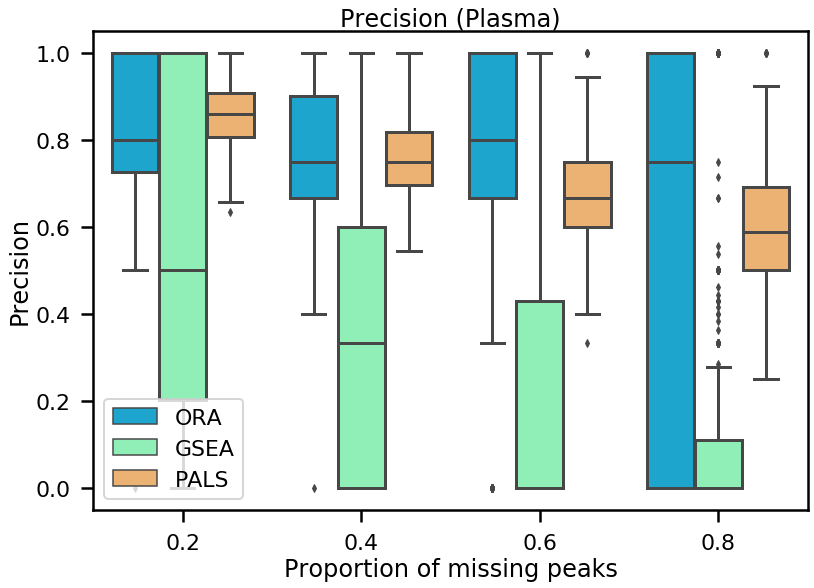

In [65]:
ax = sns.boxplot(x='missing_peaks', y='precision', hue='method', hue_order=['ORA', 'GSEA', 'PALS'], data=plasma_f1_df, palette=("rainbow"))
ax.set(ylabel='Precision', xlabel='Proportion of missing peaks')
plt.legend(loc='lower left')
plt.title('Precision (Plasma)')
plt.savefig(os.path.join('test_data', 'HAT', 'evaluation_precision_plasma.eps'), dpi=300)

In [83]:
plasma_f1_df[plasma_f1_df['method'] == 'PALS'].groupby('missing_peaks').describe()['recall']

,count,mean,std,min,25%,50%,75%,max
missing_peaks,,,,,,,,
0.2,500.0,0.865565,0.087646,0.565217,0.826087,0.869565,0.913043,1.000000
0.4,500.0,0.740000,0.113888,0.434783,0.652174,0.739130,0.826087,0.956522
0.6,500.0,0.594000,0.122942,0.304348,0.521739,0.565217,0.695652,0.956522
0.8,500.0,0.406087,0.117044,0.043478,0.304348,0.391304,0.478261,0.782609


In [84]:
plasma_f1_df[plasma_f1_df['method'] == 'ORA'].groupby('missing_peaks').describe()['recall']

,count,mean,std,min,25%,50%,75%,max
missing_peaks,,,,,,,,
0.2,500.0,0.726222,0.214076,0.0,0.555556,0.777778,0.888889,1.000000
0.4,500.0,0.526667,0.211041,0.0,0.333333,0.555556,0.666667,1.000000
0.6,500.0,0.327778,0.197196,0.0,0.222222,0.333333,0.444444,0.888889
0.8,500.0,0.136667,0.149597,0.0,0.000000,0.111111,0.222222,0.666667


In [85]:
plasma_f1_df[plasma_f1_df['method'] == 'GSEA'].groupby('missing_peaks').describe()['recall']

,count,mean,std,min,25%,50%,75%,max
missing_peaks,,,,,,,,
0.2,500.0,0.29600,0.266154,0.0,0.125,0.250,0.500,1.000
0.4,500.0,0.20750,0.238212,0.0,0.000,0.125,0.250,1.000
0.6,500.0,0.14375,0.209655,0.0,0.000,0.000,0.250,0.875
0.8,500.0,0.06350,0.132534,0.0,0.000,0.000,0.125,0.875


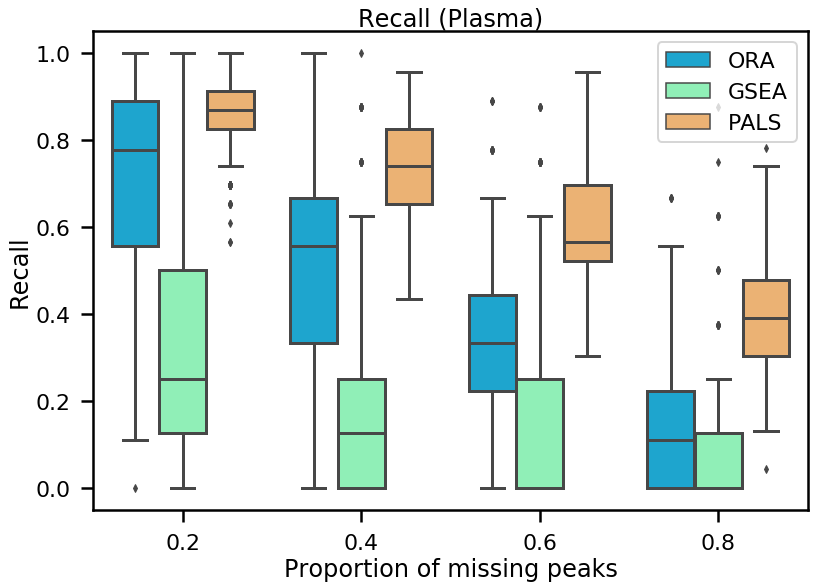

In [66]:
ax = sns.boxplot(x='missing_peaks', y='recall', hue='method', hue_order=['ORA', 'GSEA', 'PALS'], data=plasma_f1_df, palette=("rainbow"))
ax.set(ylabel='Recall', xlabel='Proportion of missing peaks')
plt.legend(loc='upper right')
plt.title('Recall (Plasma)')
plt.savefig(os.path.join('test_data', 'HAT', 'evaluation_recall_plasma.eps'), dpi=300)

In [15]:
plasma_f1_df[plasma_f1_df['method'] == 'PALS'].groupby('missing_peaks').describe()['F1']

,count,mean,std,min,25%,50%,75%,max
missing_peaks,,,,,,,,
0.2,500.0,0.856228,0.058814,0.619048,0.820513,0.863636,0.897959,1.000000
0.4,500.0,0.741708,0.072351,0.533333,0.697674,0.750000,0.791667,0.913043
0.6,500.0,0.622435,0.085509,0.377358,0.571429,0.622222,0.666667,0.851064
0.8,500.0,0.468962,0.099777,0.083333,0.400000,0.470588,0.540541,0.734694


In [16]:
plasma_f1_df[plasma_f1_df['method'] == 'ORA'].groupby('missing_peaks').describe()['F1']

,count,mean,std,min,25%,50%,75%,max
missing_peaks,,,,,,,,
0.2,500.0,0.737698,0.127275,0.0,0.666667,0.750000,0.823529,1.000000
0.4,500.0,0.593447,0.166536,0.0,0.500000,0.615385,0.705882,0.947368
0.6,500.0,0.430231,0.207211,0.0,0.307692,0.461538,0.588235,0.941176
0.8,500.0,0.204692,0.197048,0.0,0.000000,0.200000,0.340909,0.800000


In [17]:
plasma_f1_df[plasma_f1_df['method'] == 'GSEA'].groupby('missing_peaks').describe()['F1']

,count,mean,std,min,25%,50%,75%,max
missing_peaks,,,,,,,,
0.2,500.0,0.321702,0.229518,0.0,0.166667,0.363636,0.519324,0.888889
0.4,500.0,0.219297,0.200216,0.0,0.000000,0.222222,0.363636,0.705882
0.6,500.0,0.148596,0.178925,0.0,0.000000,0.000000,0.222222,0.800000
0.8,500.0,0.068579,0.126935,0.0,0.000000,0.000000,0.125000,0.666667


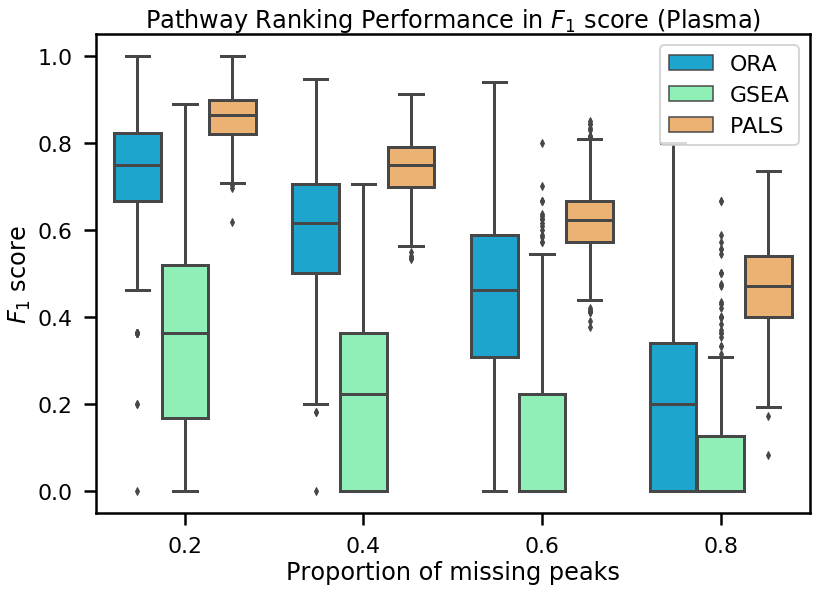

In [67]:
ax = sns.boxplot(x='missing_peaks', y='F1', hue='method', hue_order=['ORA', 'GSEA', 'PALS'], data=plasma_f1_df, palette=("rainbow"))
ax.set(ylabel='$F_{1}$ score', xlabel='Proportion of missing peaks')
plt.legend(loc='upper right')
plt.title('Pathway Ranking Performance in $F_{1}$ score (Plasma)')
plt.savefig(os.path.join('test_data', 'HAT', 'evaluation_f1_plasma.eps'), dpi=300)

In [20]:
# plasma_auc_df = get_auc_for_hat_data(res, method_true_answers)

In [21]:
# sns.boxplot(x='proportion', y='auc', hue='method', hue_order=['ORA', 'GSEA', 'PALS'], data=plasma_auc_df, palette=("rainbow"))
# plt.legend(loc='upper left')
# plt.title('AUC Performance (Plasma)')
# plt.savefig(os.path.join('test_data', 'HAT', 'auc_plasma.eps'), dpi=300)

### CSF

In [22]:
experiment_name = 'csf'
res = results[experiment_name]
method_true_answers = get_method_true_answers(res, N=N)

2020-02-09 15:32:35.960 | DEBUG    | pals.feature_extraction:change_zero_peak_ints:295 - Setting the zero intensity values in the dataframe
2020-02-09 15:32:36.028 | DEBUG    | pals.feature_extraction:standardize_intensity_df:276 - Scaling the data across the sample: zero mean and unit variance
2020-02-09 15:32:36.061 | DEBUG    | pals.PALS:get_plage_activity_df:79 - Mean values of the rows in the DF is [ 0.  0.  0. ... -0. -0. -0.]
2020-02-09 15:32:36.062 | DEBUG    | pals.PALS:get_plage_activity_df:80 - Variance in the rows of the DF is [1. 1. 1. ... 1. 1. 1.]
2020-02-09 15:32:38.397 | DEBUG    | pals.PALS:set_up_resample_plage_p_df:91 - Calculating plage p-values with resampling
2020-02-09 15:32:38.398 | DEBUG    | pals.PALS:set_up_resample_plage_p_df:98 - Comparison Stage_2/Control
2020-02-09 15:32:38.399 | DEBUG    | pals.PALS:set_up_resample_plage_p_df:106 - Resampling 0/1000
2020-02-09 15:32:38.516 | DEBUG    | pals.PALS:set_up_resample_plage_p_df:106 - Resampling 100/1000
2020-

In [23]:
results['csf']['data_source'].get_measurements().shape, results['csf']['case'], \
len(results['csf']['data_source'].groups[results['csf']['case']]), \
results['csf']['control'], \
len(results['csf']['data_source'].groups[results['csf']['control']]), \

((8154, 57), 'Stage_2', 20, 'Control', 17)

In [24]:
method_true_answers

{'PALS':                                                pw_name       p_value  \
 map05014           Amyotrophic lateral sclerosis (ALS)  2.020561e-12   
 map02030                          Bacterial chemotaxis  7.923489e-12   
 map00592               alpha-Linolenic acid metabolism  3.254354e-11   
 map00640                         Propanoate metabolism  3.524724e-11   
 map00260      Glycine, serine and threonine metabolism  5.486499e-11   
 ...                                                ...           ...   
 map00254                        Aflatoxin biosynthesis  2.858551e-02   
 map00980  Metabolism of xenobiotics by cytochrome P450  3.247831e-02   
 map00230                             Purine metabolism  3.530589e-02   
 map00472         D-Arginine and D-ornithine metabolism  3.604228e-02   
 map00740                         Riboflavin metabolism  4.107704e-02   
 
                     sf  unq_pw_F  tot_ds_F  F_coverage  
 map05014  2.790679e-01        10         2       20.00 

In [25]:
csf_f1_df = evaluate_performance(res, method_true_answers, N=N)

2020-02-09 15:33:44.795 | DEBUG    | pals.evaluation:evaluate_performance:425 - Evaluating partial results
2020-02-09 15:33:59.519 | DEBUG    | pals.evaluation:evaluate_performance:462 - Done!


In [76]:
csf_f1_df[csf_f1_df['method'] == 'PALS'].groupby('missing_peaks').describe()['precision']

,count,mean,std,min,25%,50%,75%,max
missing_peaks,,,,,,,,
0.2,500.0,0.948112,0.023722,0.870968,0.932393,0.950000,0.964286,1.0
0.4,500.0,0.911048,0.034531,0.815385,0.890369,0.912500,0.934424,1.0
0.6,500.0,0.875942,0.046792,0.736842,0.845196,0.880597,0.909091,1.0
0.8,500.0,0.822403,0.076259,0.607143,0.769231,0.828348,0.880000,1.0


In [78]:
csf_f1_df[csf_f1_df['method'] == 'ORA'].groupby('missing_peaks').describe()['precision']

,count,mean,std,min,25%,50%,75%,max
missing_peaks,,,,,,,,
0.2,500.0,0.952034,0.042971,0.833333,0.918919,0.950610,1.000000,1.0
0.4,500.0,0.922190,0.049086,0.744186,0.885714,0.923077,0.964286,1.0
0.6,500.0,0.894017,0.067338,0.697674,0.847902,0.900000,0.947368,1.0
0.8,500.0,0.884757,0.124852,0.000000,0.833333,0.893797,1.000000,1.0


In [79]:
csf_f1_df[csf_f1_df['method'] == 'GSEA'].groupby('missing_peaks').describe()['precision']

,count,mean,std,min,25%,50%,75%,max
missing_peaks,,,,,,,,
0.2,500.0,0.550023,0.308011,0.0,0.342509,0.555556,0.782609,1.0
0.4,500.0,0.463634,0.335266,0.0,0.215686,0.457428,0.720556,1.0
0.6,500.0,0.408914,0.336037,0.0,0.000000,0.366366,0.666667,1.0
0.8,500.0,0.285049,0.320519,0.0,0.000000,0.207419,0.500000,1.0


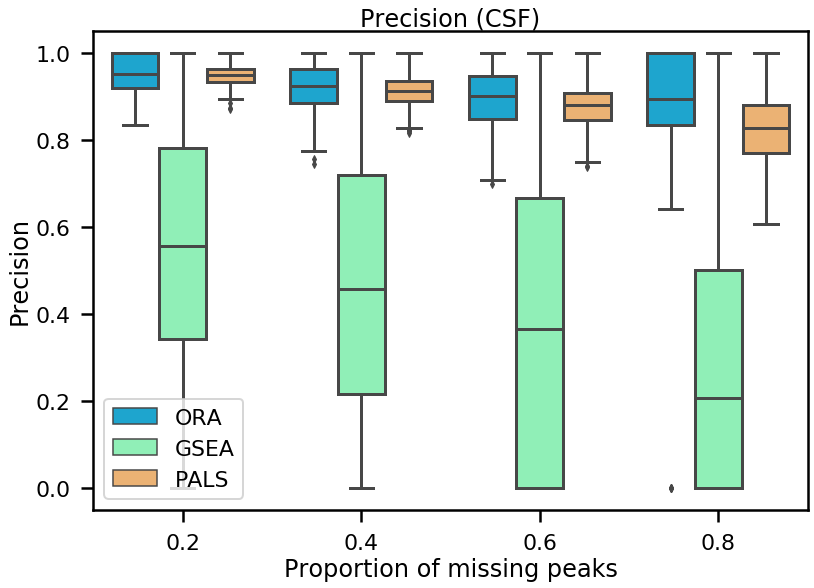

In [68]:
ax = sns.boxplot(x='missing_peaks', y='precision', hue='method', hue_order=['ORA', 'GSEA', 'PALS'], data=csf_f1_df, palette=("rainbow"))
ax.set(ylabel='Precision', xlabel='Proportion of missing peaks')
plt.legend(loc='lower left')
plt.title('Precision (CSF)')
plt.savefig(os.path.join('test_data', 'HAT', 'evaluation_precision_csf.eps'), dpi=300)

In [80]:
csf_f1_df[csf_f1_df['method'] == 'PALS'].groupby('missing_peaks').describe()['recall']

,count,mean,std,min,25%,50%,75%,max
missing_peaks,,,,,,,,
0.2,500.0,0.921364,0.040693,0.784091,0.897727,0.931818,0.954545,1.000000
0.4,500.0,0.836818,0.073036,0.488636,0.795455,0.852273,0.886364,0.965909
0.6,500.0,0.717432,0.114186,0.340909,0.647727,0.738636,0.795455,0.943182
0.8,500.0,0.524295,0.138525,0.125000,0.420455,0.534091,0.636364,0.840909


In [81]:
csf_f1_df[csf_f1_df['method'] == 'ORA'].groupby('missing_peaks').describe()['recall']

,count,mean,std,min,25%,50%,75%,max
missing_peaks,,,,,,,,
0.2,500.0,0.868465,0.060336,0.558140,0.837209,0.883721,0.906977,0.976744
0.4,500.0,0.743953,0.087282,0.395349,0.697674,0.744186,0.813953,0.930233
0.6,500.0,0.610698,0.129362,0.232558,0.534884,0.627907,0.697674,0.883721
0.8,500.0,0.374326,0.169204,0.000000,0.255814,0.372093,0.511628,0.837209


In [82]:
csf_f1_df[csf_f1_df['method'] == 'GSEA'].groupby('missing_peaks').describe()['recall']

,count,mean,std,min,25%,50%,75%,max
missing_peaks,,,,,,,,
0.2,500.0,0.524364,0.373602,0.0,0.090909,0.636364,0.875000,1.000000
0.4,500.0,0.433818,0.369118,0.0,0.045455,0.409091,0.818182,1.000000
0.6,500.0,0.350273,0.340247,0.0,0.000000,0.227273,0.681818,1.000000
0.8,500.0,0.209091,0.267175,0.0,0.000000,0.090909,0.363636,0.954545


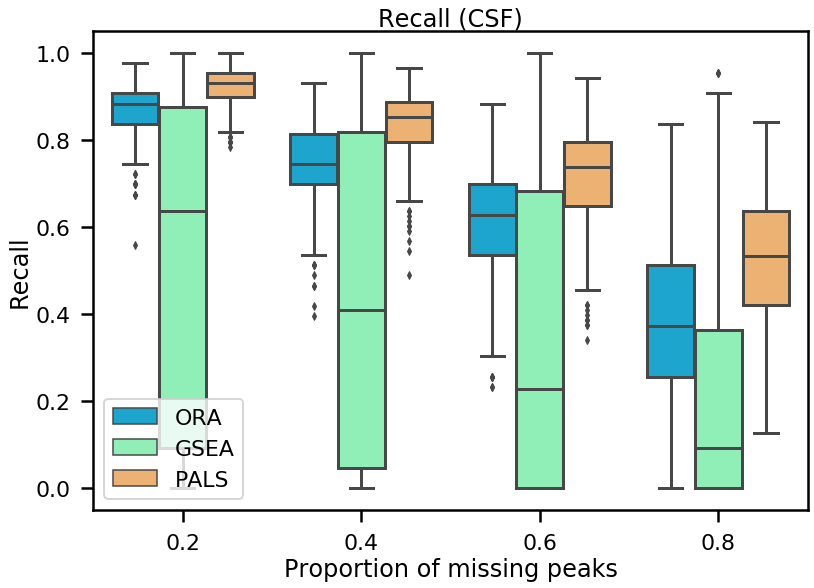

In [69]:
ax = sns.boxplot(x='missing_peaks', y='recall', hue='method', hue_order=['ORA', 'GSEA', 'PALS'], data=csf_f1_df, palette=("rainbow"))
ax.set(ylabel='Recall', xlabel='Proportion of missing peaks')
plt.legend(loc='lower left')
plt.title('Recall (CSF)')
plt.savefig(os.path.join('test_data', 'HAT', 'evaluation_recall_csf.eps'), dpi=300)

In [26]:
csf_f1_df[csf_f1_df['method'] == 'PALS'].groupby('missing_peaks').describe()['F1']

,count,mean,std,min,25%,50%,75%,max
missing_peaks,,,,,,,,
0.2,500.0,0.933866,0.022791,0.843373,0.918605,0.936416,0.949295,0.982857
0.4,500.0,0.870231,0.043933,0.632353,0.850299,0.878613,0.899702,0.947977
0.6,500.0,0.782876,0.076056,0.495868,0.750000,0.802432,0.835622,0.912088
0.8,500.0,0.629329,0.114978,0.213592,0.552239,0.643357,0.723535,0.855422


In [27]:
csf_f1_df[csf_f1_df['method'] == 'ORA'].groupby('missing_peaks').describe()['F1']

,count,mean,std,min,25%,50%,75%,max
missing_peaks,,,,,,,,
0.2,500.0,0.906289,0.034044,0.716418,0.886076,0.906977,0.928571,0.988235
0.4,500.0,0.819204,0.053939,0.566667,0.789474,0.826667,0.857143,0.938272
0.6,500.0,0.713347,0.091377,0.370370,0.666667,0.729730,0.777778,0.875000
0.8,500.0,0.498212,0.175294,0.000000,0.393296,0.531250,0.637681,0.827586


In [28]:
csf_f1_df[csf_f1_df['method'] == 'GSEA'].groupby('missing_peaks').describe()['F1']

,count,mean,std,min,25%,50%,75%,max
missing_peaks,,,,,,,,
0.2,500.0,0.435859,0.268155,0.0,0.166667,0.500000,0.666667,0.871795
0.4,500.0,0.357195,0.265392,0.0,0.086957,0.401835,0.586667,0.844444
0.6,500.0,0.291500,0.239698,0.0,0.000000,0.307692,0.489116,0.818182
0.8,500.0,0.184847,0.203962,0.0,0.000000,0.102564,0.345159,0.844444


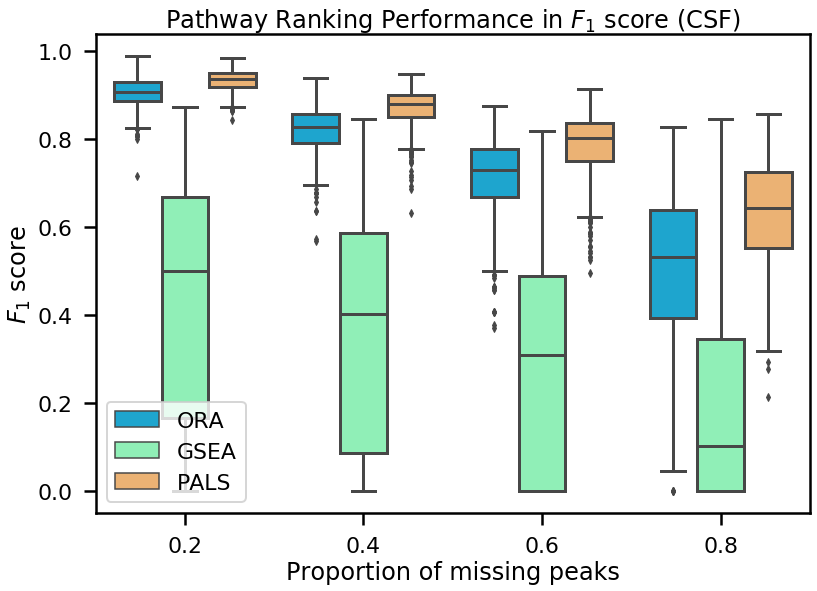

In [70]:
ax = sns.boxplot(x='missing_peaks', y='F1', hue='method', hue_order=['ORA', 'GSEA', 'PALS'], data=csf_f1_df, palette=("rainbow"))
ax.set(ylabel='$F_{1}$ score', xlabel='Proportion of missing peaks')
plt.legend(loc='lower left')
plt.title('Pathway Ranking Performance in $F_{1}$ score (CSF)')
plt.savefig(os.path.join('test_data', 'HAT', 'evaluation_f1_csf.eps'), dpi=300)

In [35]:
# csf_auc_df = get_auc_for_hat_data(res, method_true_answers)

In [36]:
# sns.boxplot(x='proportion', y='auc', hue='method', hue_order=['ORA', 'GSEA', 'PALS'], data=csf_auc_df)
# plt.legend(loc='upper left')
# plt.title('AUC Performance (Plasma)')
# plt.savefig(os.path.join('test_data', 'HAT', 'auc_csf.eps'), dpi=300)

### Combined Plot

In [37]:
plasma_f1_df['data'] = 'Plasma'
csf_f1_df['data'] = 'CSF'

In [38]:
df = pd.concat([plasma_f1_df, csf_f1_df])
df.shape

(12000, 10)

In [40]:
df

,method,missing_peaks,i,TP,FP,FN,precision,recall,F1,data
0,PALS,0.2,0,20,6,3,0.769231,0.869565,0.816327,Plasma
1,ORA,0.2,0,7,1,2,0.875000,0.777778,0.823529,Plasma
2,GSEA,0.2,0,6,6,2,0.500000,0.750000,0.600000,Plasma
3,PALS,0.2,1,23,2,0,0.920000,1.000000,0.958333,Plasma
4,ORA,0.2,1,4,0,5,1.000000,0.444444,0.615385,Plasma
...,...,...,...,...,...,...,...,...,...,...
5995,ORA,0.8,498,26,6,17,0.812500,0.604651,0.693333,CSF
5996,GSEA,0.8,498,0,7,22,0.000000,0.000000,0.000000,CSF
5997,PALS,0.8,499,49,14,39,0.777778,0.556818,0.649007,CSF
5998,ORA,0.8,499,31,7,12,0.815789,0.720930,0.765432,CSF


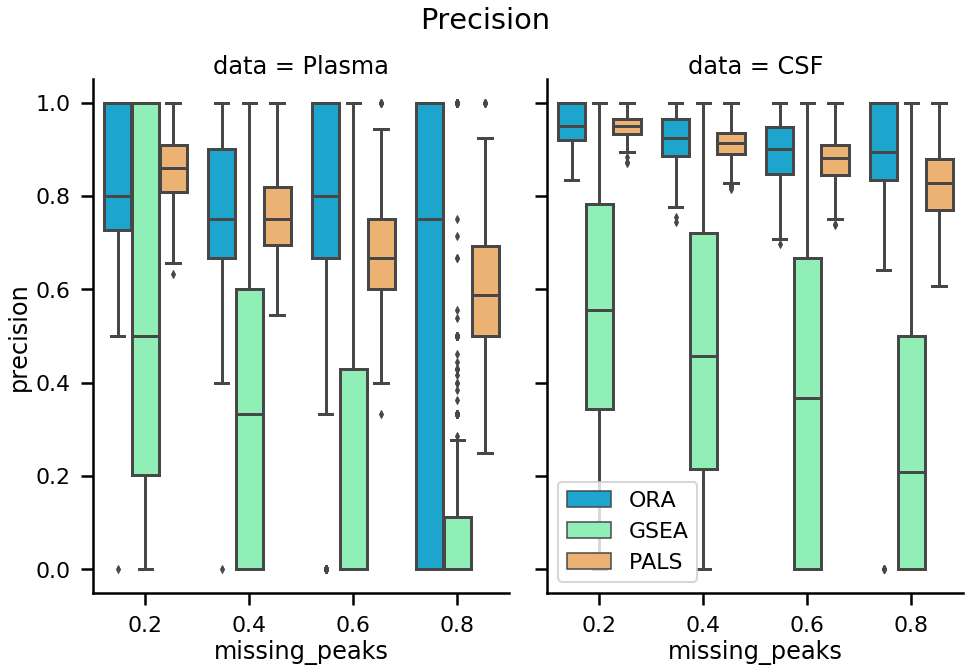

In [72]:
g = sns.catplot(x="missing_peaks", y="precision", hue="method", hue_order=['ORA', 'GSEA', 'PALS'], col="data", data=df, kind="box", height=10, aspect=0.7, 
                palette=("rainbow"), legend=False)
plt.suptitle('Precision')
plt.legend(loc='lower left')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(os.path.join('test_data', 'HAT', 'evaluation_precision.eps'), dpi=300)

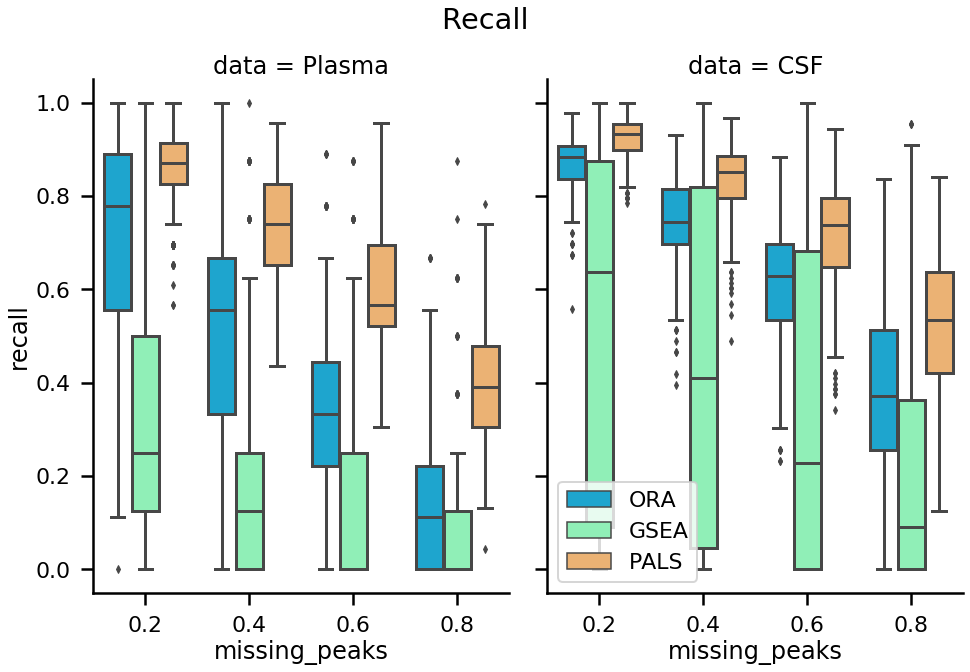

In [73]:
g = sns.catplot(x="missing_peaks", y="recall", hue="method", hue_order=['ORA', 'GSEA', 'PALS'], col="data", data=df, kind="box", height=10, aspect=0.7, 
                palette=("rainbow"), legend=False)
plt.suptitle('Recall')
plt.legend(loc='lower left')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(os.path.join('test_data', 'HAT', 'evaluation_recall.eps'), dpi=300)

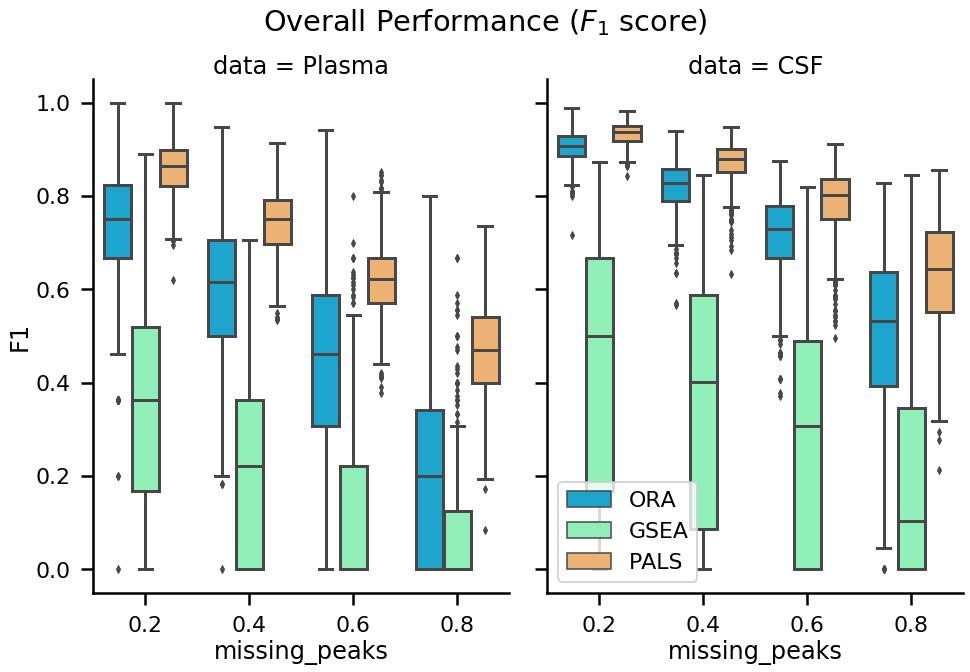

In [75]:
g = sns.catplot(x="missing_peaks", y="F1", hue="method", hue_order=['ORA', 'GSEA', 'PALS'], col="data", data=df, kind="box", height=10, aspect=0.7, 
                palette=("rainbow"), legend=False)
plt.suptitle('Overall Performance ($F_{1}$ score)')
plt.legend(loc='lower left')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(os.path.join('test_data', 'HAT', 'evaluation_f1.eps'), dpi=300)

#### True Positives

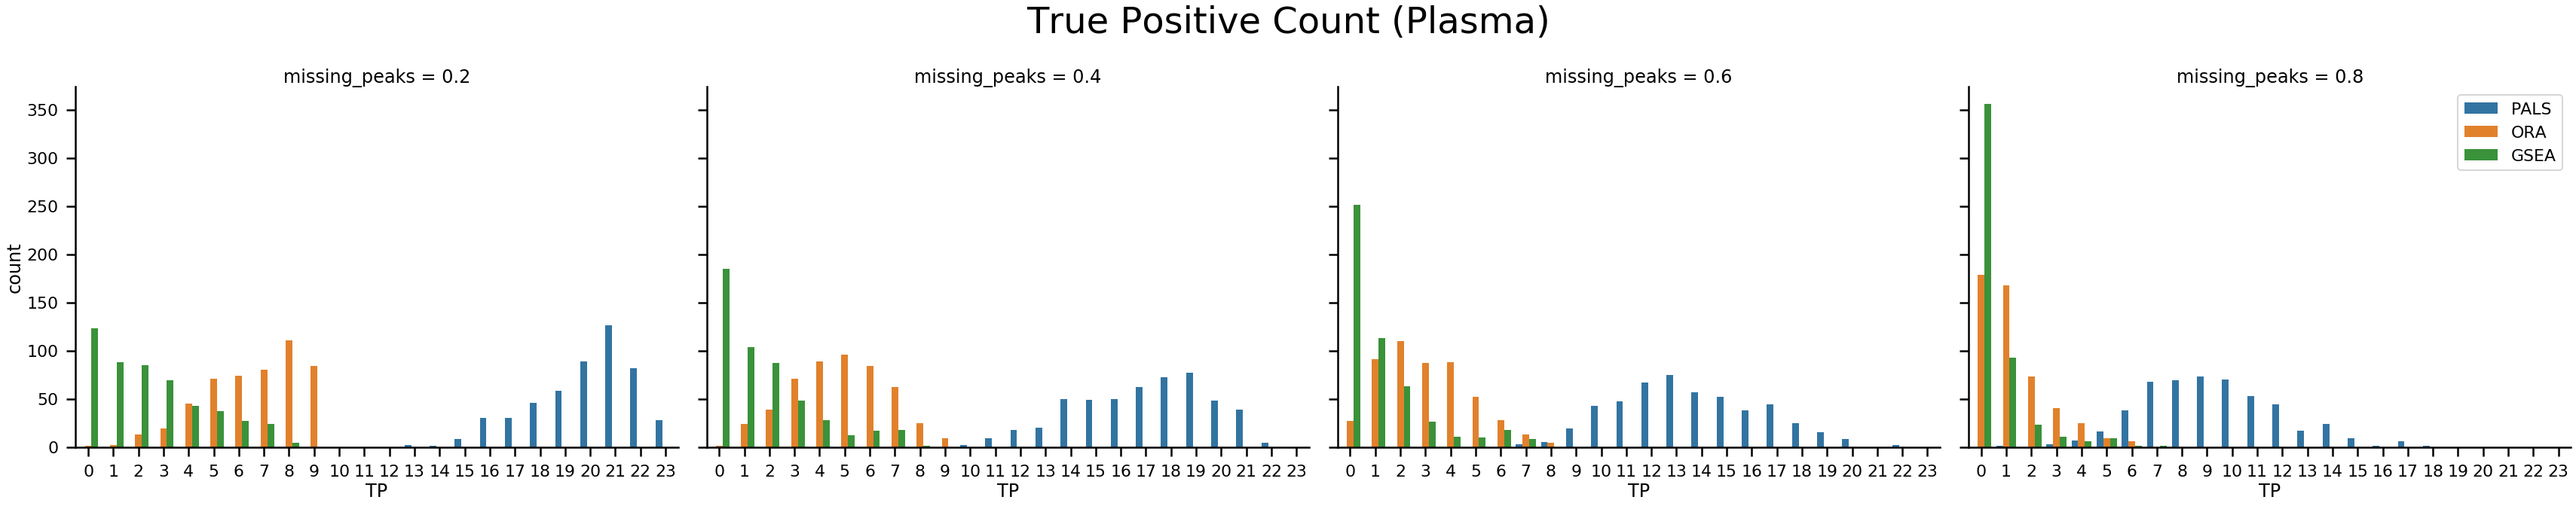

In [44]:
g = sns.catplot(x="TP", col='missing_peaks', hue="method", data=plasma_f1_df, kind="count", height=10, aspect=1.2, legend=False)
plt.suptitle('True Positive Count (Plasma)', fontsize=48)
plt.tight_layout(rect=[0, 0.03, 1, 0.90])
plt.legend(loc='upper right')
plt.savefig(os.path.join('test_data', 'HAT', 'evaluation_plasma_TP.eps'), dpi=300)

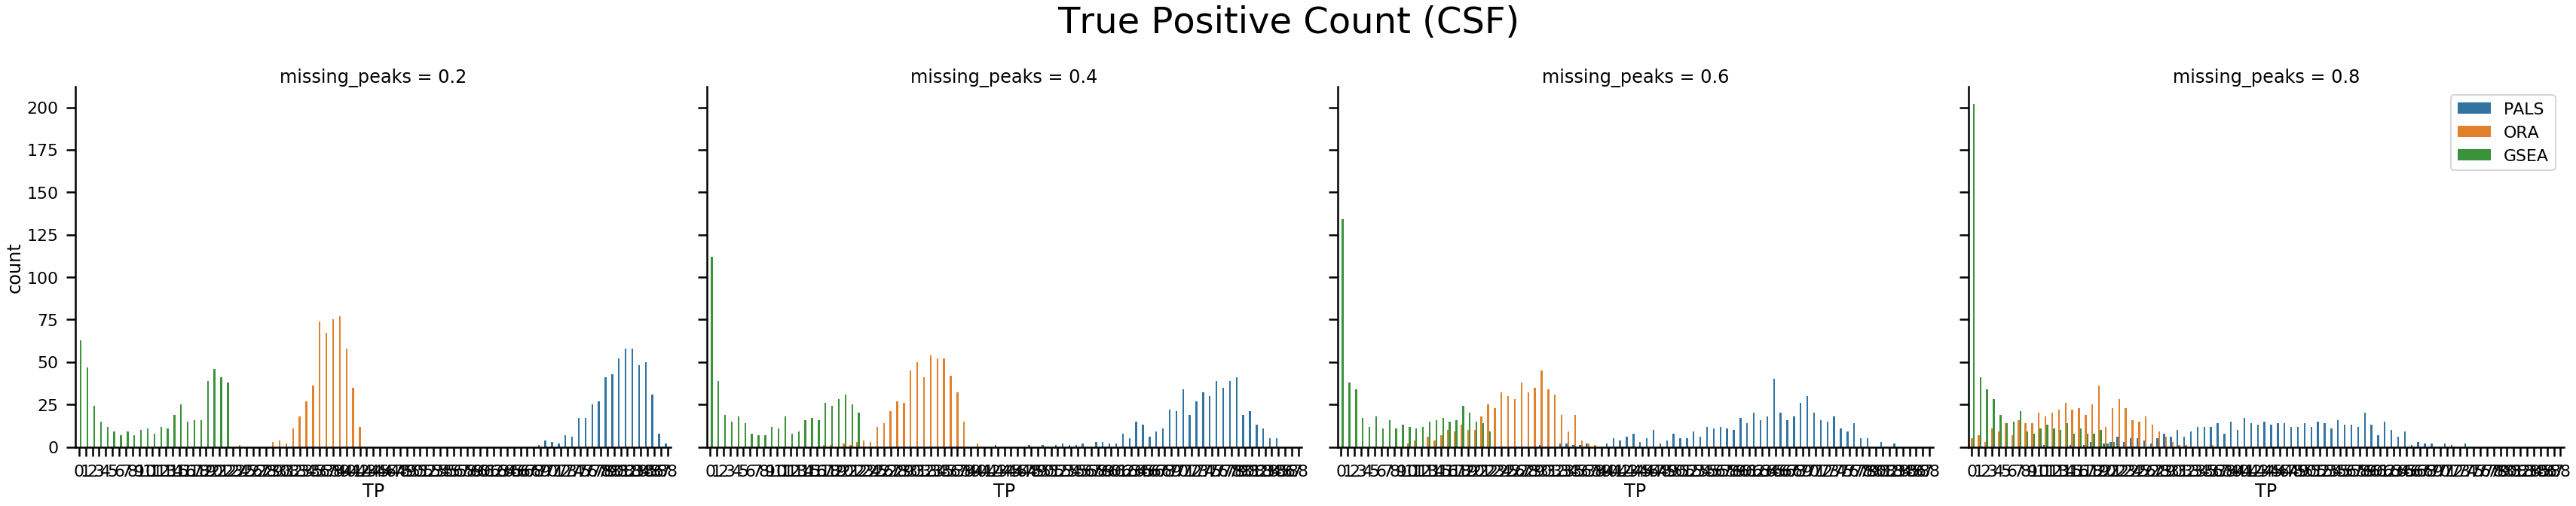

In [45]:
g = sns.catplot(x="TP", col='missing_peaks', hue="method", data=csf_f1_df, kind="count", height=10, aspect=1.2, legend=False)
plt.suptitle('True Positive Count (CSF)', fontsize=48)
plt.tight_layout(rect=[0, 0.03, 1, 0.90])
plt.legend(loc='upper right')
plt.savefig(os.path.join('test_data', 'HAT', 'evaluation_csf_TP.eps'), dpi=300)

#### False Positives

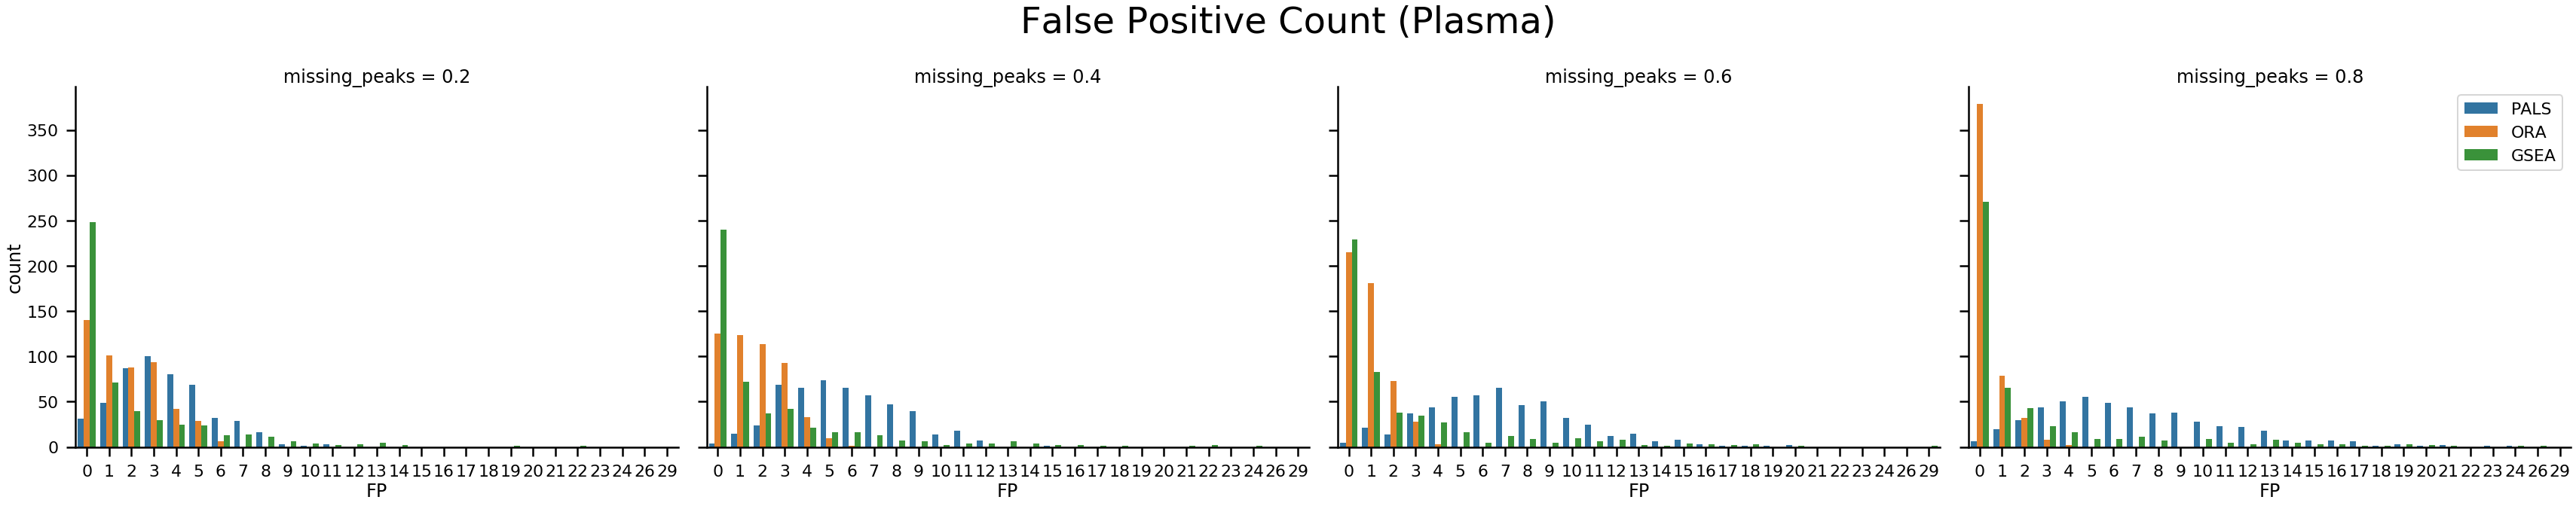

In [46]:
g = sns.catplot(x="FP", col='missing_peaks', hue="method", data=plasma_f1_df, kind="count", height=10, aspect=1.2, legend=False)
plt.suptitle('False Positive Count (Plasma)', fontsize=48)
plt.tight_layout(rect=[0, 0.03, 1, 0.90])
plt.legend(loc='upper right')
plt.savefig(os.path.join('test_data', 'HAT', 'evaluation_plasma_FP.eps'), dpi=300)

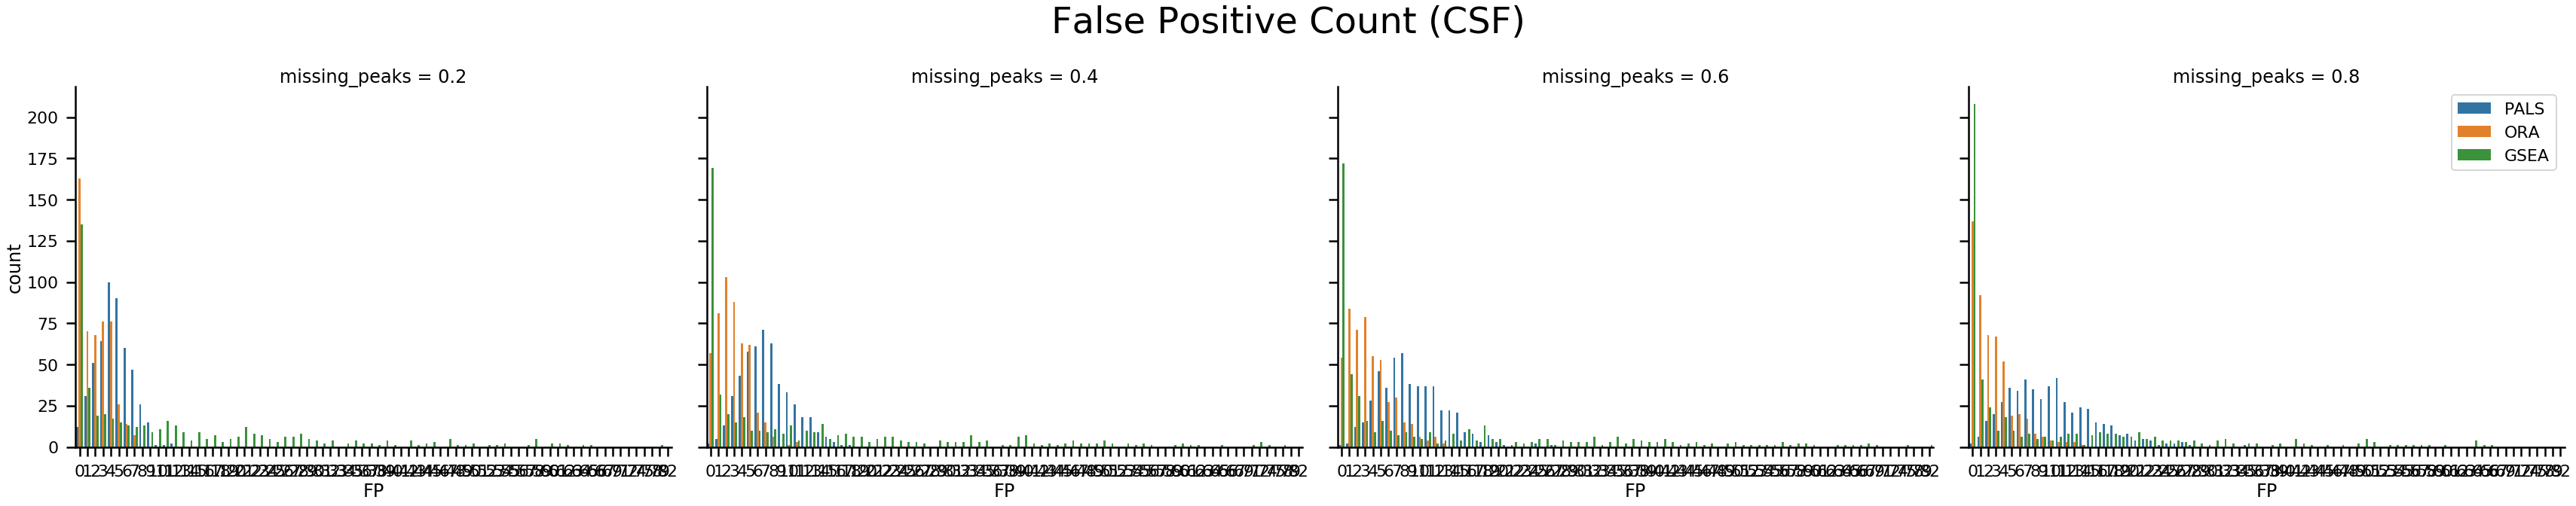

In [47]:
g = sns.catplot(x="FP", col='missing_peaks', hue="method", data=csf_f1_df, kind="count", height=10, aspect=1.2, legend=False)
plt.suptitle('False Positive Count (CSF)', fontsize=48)
plt.tight_layout(rect=[0, 0.03, 1, 0.90])
plt.legend(loc='upper right')
plt.savefig(os.path.join('test_data', 'HAT', 'evaluation_csf_FP.eps'), dpi=300)

#### False Negatives

In [ ]:
g = sns.catplot(x="FN", col='missing_peaks', hue="method", data=plasma_f1_df, kind="count", height=10, aspect=1.2, legend=False)
plt.suptitle('False Negative Count (Plasma)', fontsize=48)
plt.tight_layout(rect=[0, 0.03, 1, 0.90])
plt.legend(loc='upper right')
plt.savefig(os.path.join('test_data', 'HAT', 'evaluation_plasma_FN.eps'), dpi=300)

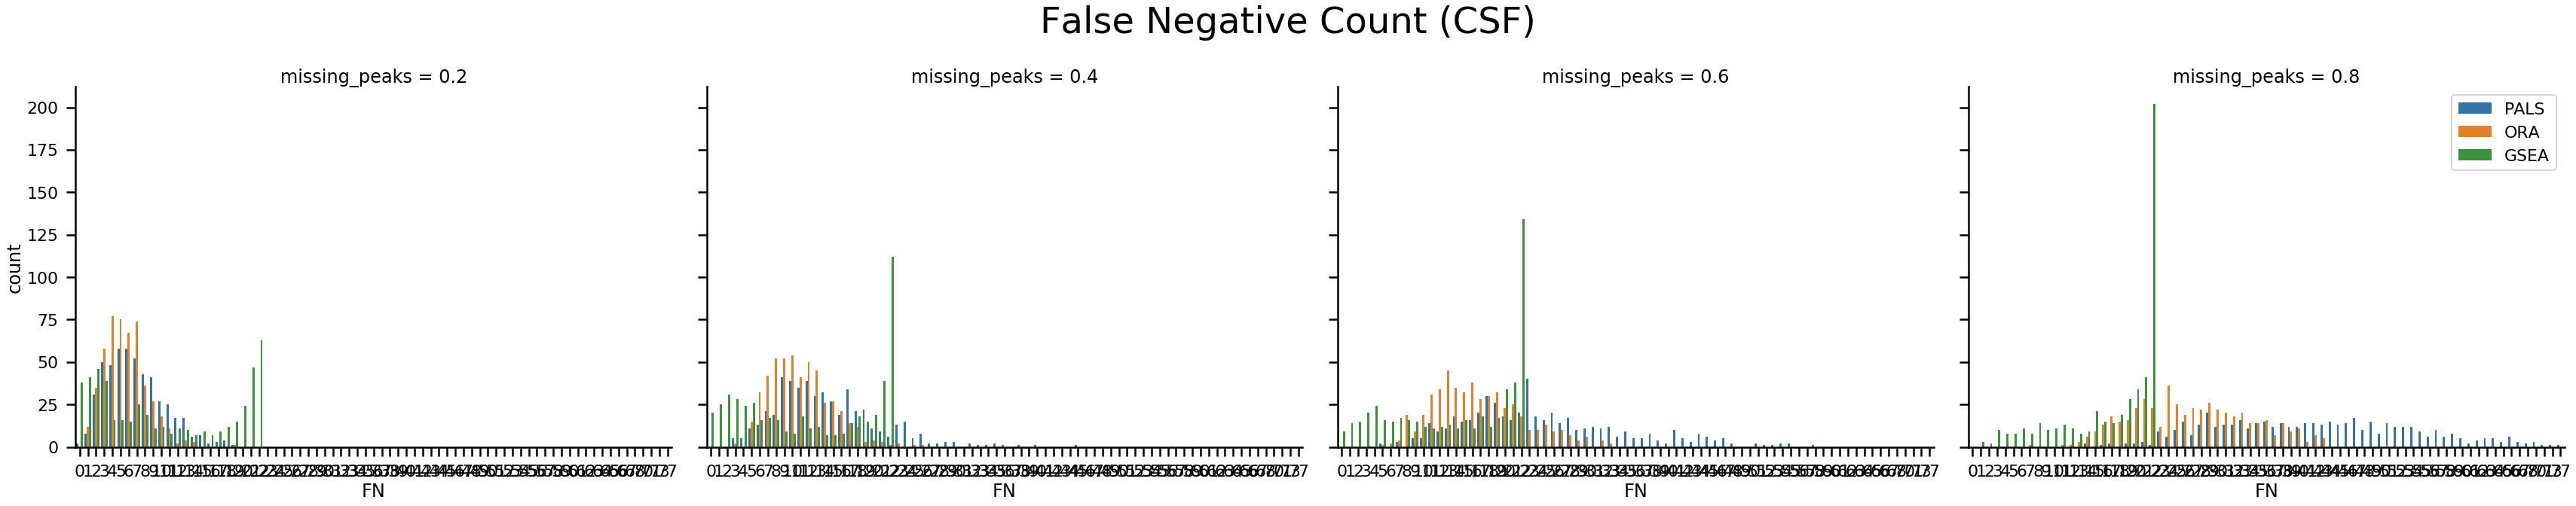

In [48]:
g = sns.catplot(x="FN", col='missing_peaks', hue="method", data=csf_f1_df, kind="count", height=10, aspect=1.2, legend=False)
plt.suptitle('False Negative Count (CSF)', fontsize=48)
plt.tight_layout(rect=[0, 0.03, 1, 0.90])
plt.legend(loc='upper right')
plt.savefig(os.path.join('test_data', 'HAT', 'evaluation_csf_FN.eps'), dpi=300)